In [4]:
#!pip install sklearn_extra
!pip install scikit-learn-extra

                                              0.0/340.5 kB ? eta -:--:--
     -                                        10.2/340.5 kB ? eta -:--:--
     -                                        10.2/340.5 kB ? eta -:--:--
     ----                                  41.0/340.5 kB 245.8 kB/s eta 0:00:02
     ---------------                      143.4/340.5 kB 774.0 kB/s eta 0:00:01
     -------------------------------------- 340.5/340.5 kB 1.5 MB/s eta 0:00:00


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from scipy import stats

# Les chiffres manuscrits
*Digits* est un jeu de données de la bibliothèque *scikit-learn* contenant des images en niveaux de gris de chiffres manuscrits de 8×8=64 pixels. Il comporte 1797 observations réparties en 10 classes, une par chiffre. Un total de 43 personnes ont participé à la collecte de données. Les valeurs de pixels sont des entiers dans l’intervalle [0,16]. Plus d’informations sont disponibles dans la documentation de scikit-learn.

In [27]:
from sklearn.datasets import load_digits
digits = datasets.load_digits() # The digits dataset
type(digits) #le jeu de données est un objet de type "Bunch" ou un conteneur de données, un type spécifique de sklearn donné aux jeus de données incorporés dans sklearn

sklearn.utils._bunch.Bunch

In [28]:
# Contenu de l'objet de type Bunch
print(digits.images)
print(digits.target)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

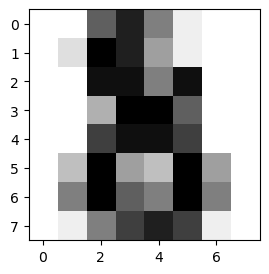

In [29]:
#Visualisation de la première image
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

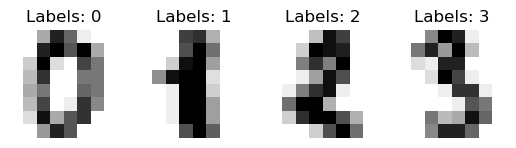

In [30]:
#Visualisation de 4 images et de leur label
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Labels: %i' % label)

In [31]:
Z=digits.images 
Y=digits.target
print(type(Z),type(Y))
print(Z.shape,Y.shape) #X est un tableau numpy à trois dimensions. Nécessité "d'applatir" les images pour obtenir un tableau à 2 dimensions

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1797, 8, 8) (1797,)


In [32]:
n_samples = len(digits.images)
Z = digits.images.reshape((n_samples, -1))
print(Z.shape,Y.shape)

(1797, 64) (1797,)


# Réduction de dimension
### ACP
Appliquer une analyse en composantes principales sur le jeu de données Digits. Visualiser le nuage de points projeté sur les deux premières composantes principales.

In [45]:
pca=PCA()
pca.fit_transform(Z)  #ACP non normée car les variables sont d'unité et d'ordre de grandeur homogène
resPCA=pca.fit_transform(Z) #Pour récupérer les composantes principales dans un nouvel objet resPCA

In [46]:
resREDUC=pd.DataFrame({
                    "ACP_Dim1" : resPCA[:,0],
                    "ACP_Dim2" : resPCA[:,1],
                    "Label" :Y
}) 
resREDUC.head() # Visualisation des premières lignes

,ACP_Dim1,ACP_Dim2,Label
0,-1.259466,21.274883,0
1,7.957611,-20.768699,1
2,6.991923,-9.955986,2
3,-15.906105,3.332464,3
4,23.306867,4.269061,4


Création d'un "dictionnaire" de couleurs, pour associer chaque label (chaque chiffre entre 0 et 9) à une couleur : 

In [36]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Paired")
# associe une couleur à chiffre c'est à dire label
couleurs = dict(zip(resREDUC["Label"].drop_duplicates(), palette(range(10))))
#couleurs
position = dict(zip(couleurs.keys(), range(10)))

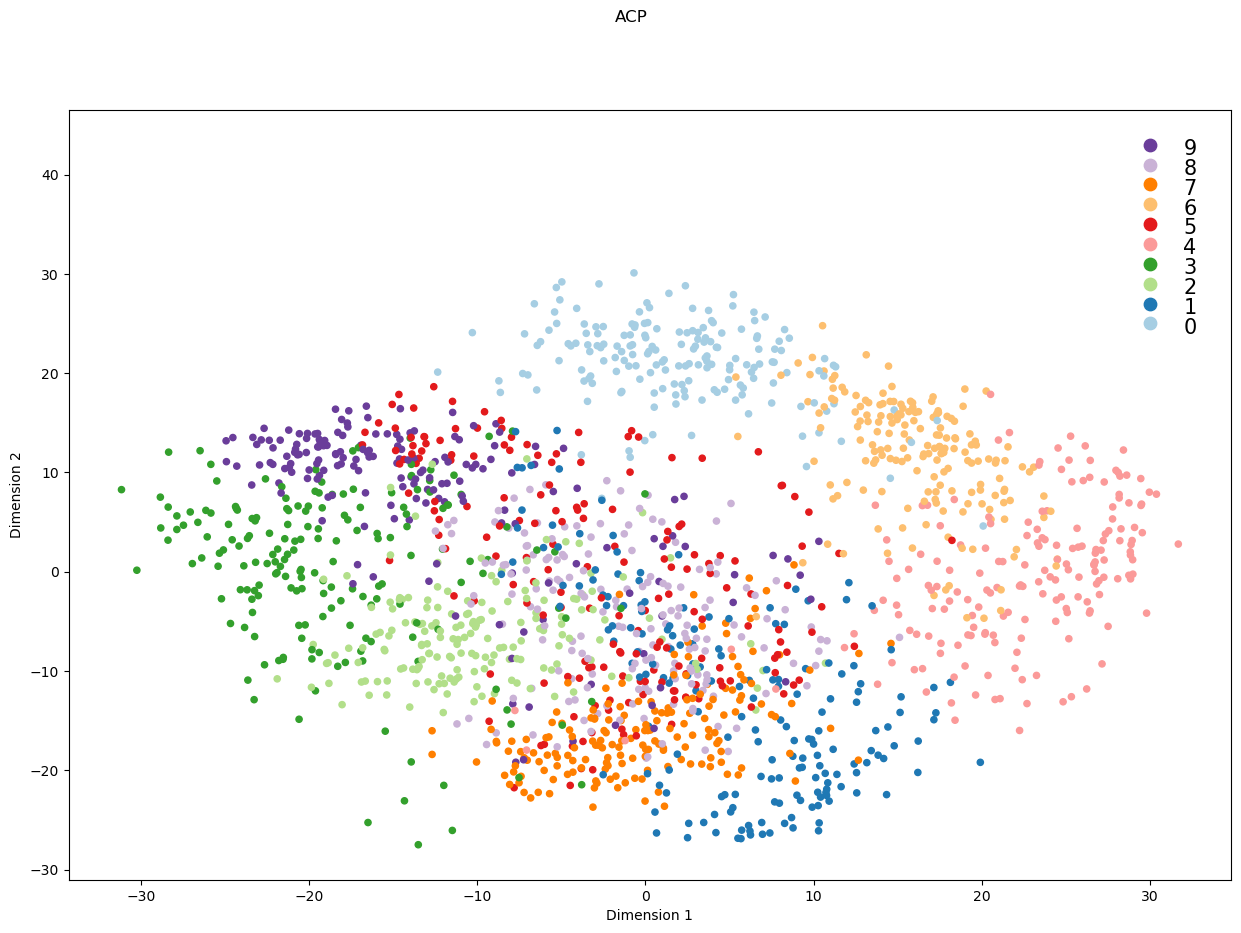

In [47]:
# Affichage des points avec une liste de couleurs
resREDUC.plot.scatter(x = "ACP_Dim1", y = "ACP_Dim2", c = [couleurs[p] for p in resREDUC["Label"]],figsize=(15,10))
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(30,position[cont]*2 + 25, c = [coul], s = 80)
    plt.text(32,position[cont]*2 + 24, cont, fontsize=15)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("ACP")
plt.show()

### t-SNE
- Appliquer une réduction de dimension à l’aide de t-SNE (n_components=2) sur le jeu de données Digits puis afficher le nuage de points résultant. 
- Faire varier la valeur du coefficient de perplexité dans une plage raisonnable (entre 1 et 100, par exemple). Que constatez-vous ?

In [42]:
tsne = TSNE(n_components=2, perplexity=30)
resTSNE = tsne.fit_transform(Z)

In [48]:
resREDUC["TSNE30_Dim1"]=resTSNE[:,0]
resREDUC["TSNE30_Dim2"]=resTSNE[:,1]
resREDUC.head()

,ACP_Dim1,ACP_Dim2,Label,TSNE30_Dim1,TSNE30_Dim2
0,-1.259466,21.274883,0,-2.953784,54.592247
1,7.957611,-20.768699,1,10.311990,-11.948957
2,6.991923,-9.955986,2,-14.268017,-18.919632
3,-15.906105,3.332464,3,-35.743240,6.373917
4,23.306867,4.269061,4,41.476543,-7.299884


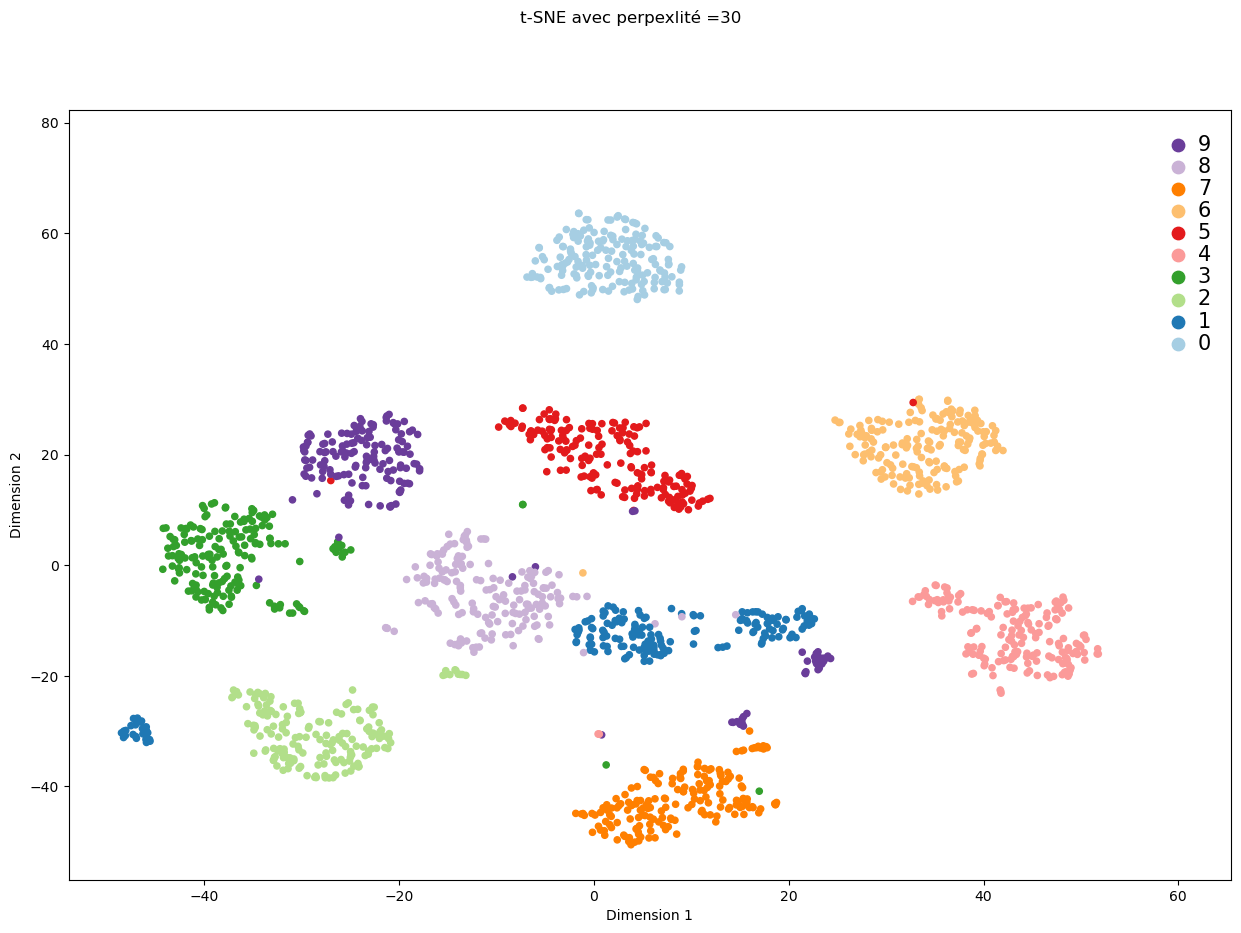

In [49]:
# Affichage des points avec une liste de couleurs
resREDUC.plot.scatter(x = "TSNE30_Dim1", y = "TSNE30_Dim2", c = [couleurs[p] for p in resREDUC["Label"]],figsize=(15,10))
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(60,position[cont]*4 + 40, c = [coul], s = 80)
    plt.text(62,position[cont]*4 + 39, cont, fontsize=15)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("t-SNE avec perpexlité =30")
plt.show()

Essayez différentes valeurs de la perplexité. Que constatez-vous ?

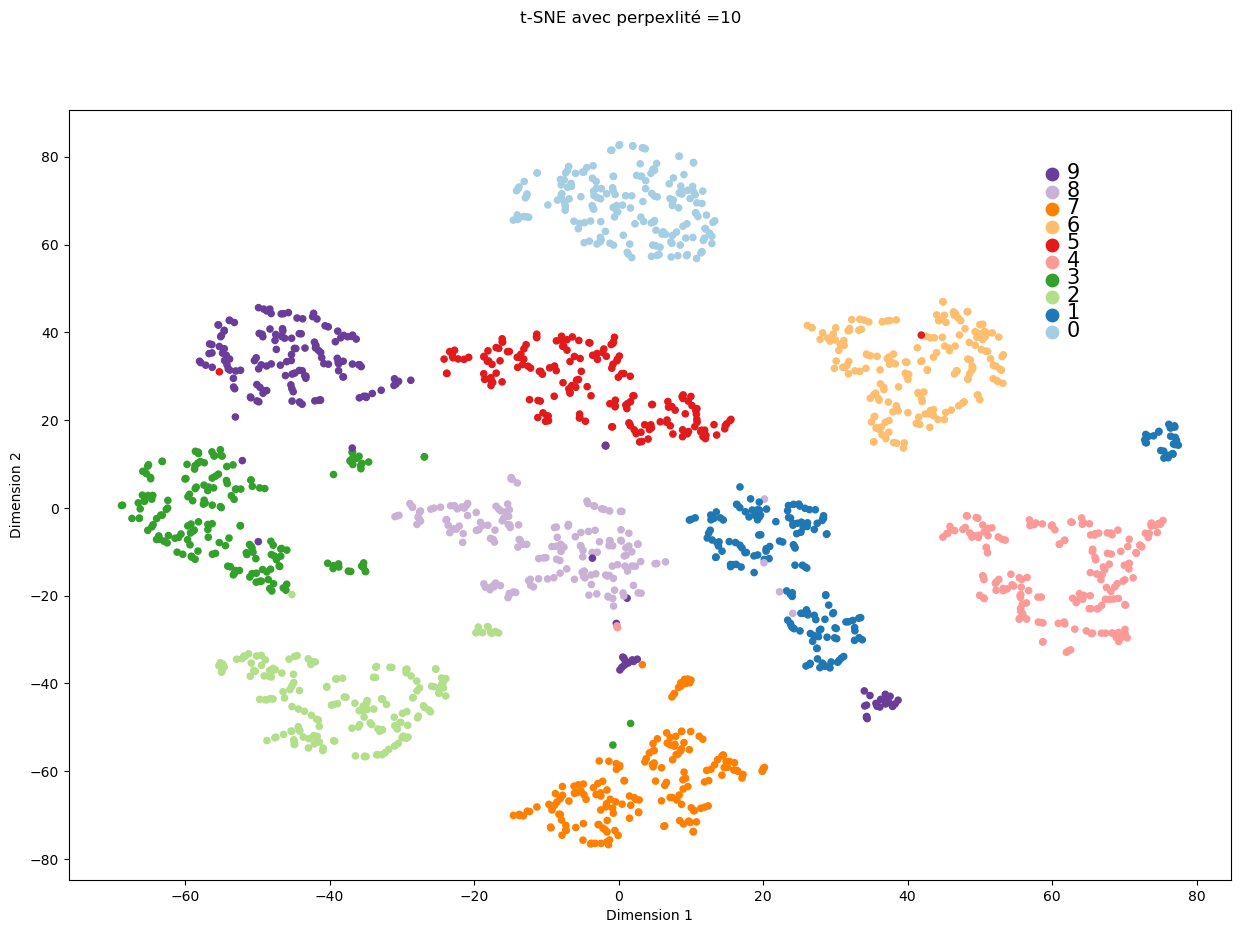

In [50]:
#Perplexité = 10
tsne = TSNE(n_components=2, perplexity=10)
resTSNE = tsne.fit_transform(Z)

resREDUC["TSNE10_Dim1"]=resTSNE[:,0]
resREDUC["TSNE10_Dim2"]=resTSNE[:,1]
resREDUC.head()

# Affichage des points avec une liste de couleurs
resREDUC.plot.scatter(x = "TSNE10_Dim1", y = "TSNE10_Dim2", c = [couleurs[p] for p in resREDUC["Label"]],figsize=(15,10))
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(60,position[cont]*4 + 40, c = [coul], s = 80)
    plt.text(62,position[cont]*4 + 39, cont, fontsize=15)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("t-SNE avec perpexlité =10")
plt.show()

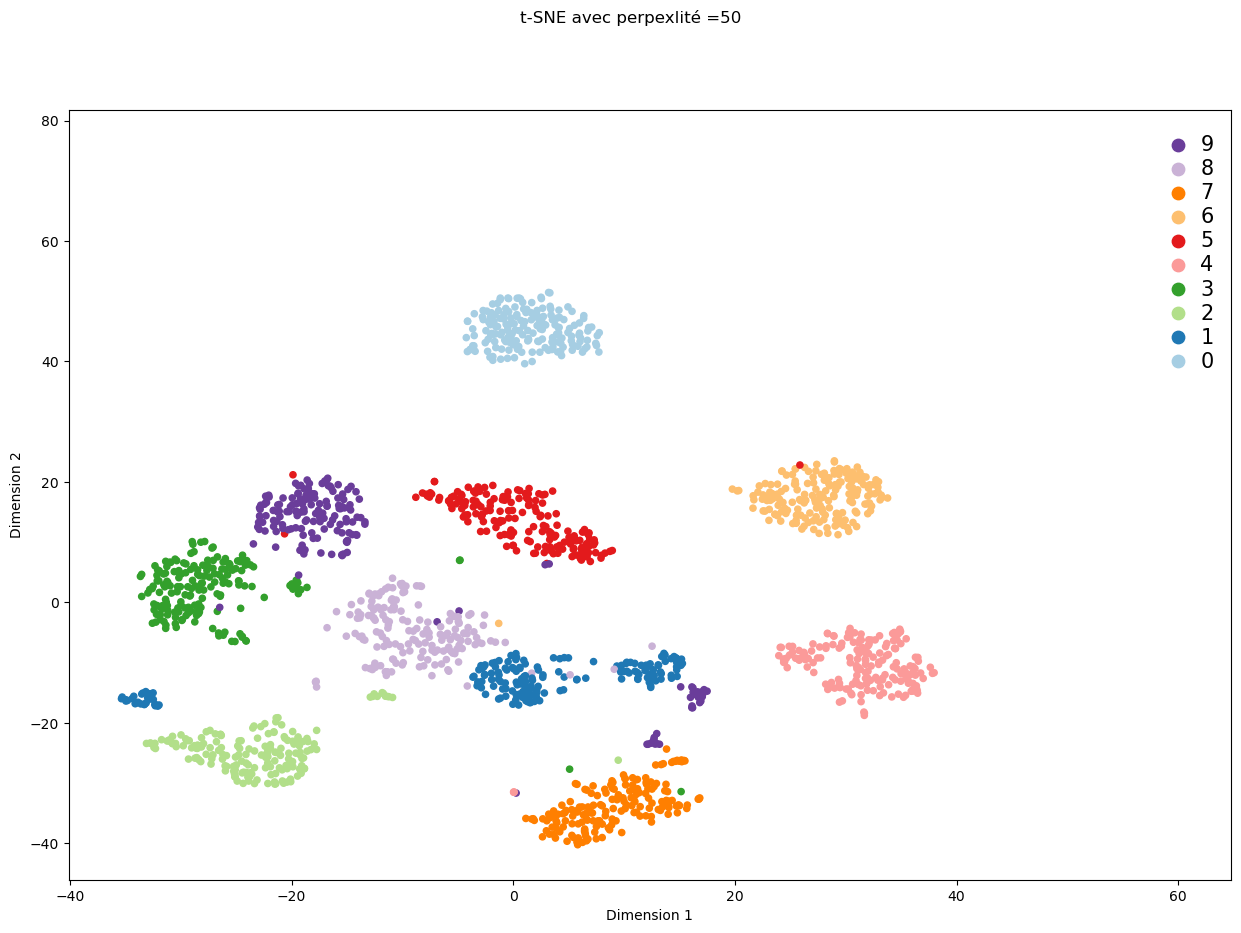

In [51]:
#Perplexité = 50
tsne = TSNE(n_components=2, perplexity=50)
resTSNE = tsne.fit_transform(Z)

resREDUC["TSNE50_Dim1"]=resTSNE[:,0]
resREDUC["TSNE50_Dim2"]=resTSNE[:,1]
resREDUC.head()

# Affichage des points avec une liste de couleurs
resREDUC.plot.scatter(x = "TSNE50_Dim1", y = "TSNE50_Dim2", c = [couleurs[p] for p in resREDUC["Label"]],figsize=(15,10))
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(60,position[cont]*4 + 40, c = [coul], s = 80)
    plt.text(62,position[cont]*4 + 39, cont, fontsize=15)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("t-SNE avec perpexlité =50")
plt.show()

Pour la suite de l'exercice, nous retiendrons 30 comme valeur de perplexité.

# Clustering des images
Comparaison de la méthode des k-Means avec celle des k-Médoïdes (PAM) en utilisant différentes distances (euclidienne, manhattan et cosinus). 

En prenant k=10, constuire la partition (le clustering) des images avec les 4 méthodes ou variantes : k-Means, k-Médoïdes + distance de euclidienne, k-Médoïdes + distance de manhattan, k-Médoïdes + distance cosinus. 

Pour méthode ou variante comparer la partition obtenue avec celle donnée par les labels.

In [52]:
#pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


### k-Means

### k-Médoïdes + distance de euclidienne

### k-Médoïdes + distance de manhattan

### k-Médoïdes + distance cosinus

### Comment peut-on avoir une idée de la méthode qui fournit des classes les plus proches des labels ?

Interprétation : le Ch² observé le plus grand est celui obtenu avec les k-Means. On peut donc penser que c'est avec les K-Means que la partition en 10 classes est la plus proche de la partition des labels (car situation la plus éloignée de la situation d'indépendance).

### Visualisation de la "meilleure" partition après réduction par l'ACP et par t-SNE